In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#as we can see dtype are object and int = float64(2), int64(2), object(3)  ==  will use encoder for this first go with preprocessing

In [7]:
df.shape,df.columns


((1338, 7),
 Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object'))

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#no null values

In [10]:
df.nunique().to_frame('nu')

,nu
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [11]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

<AxesSubplot:>

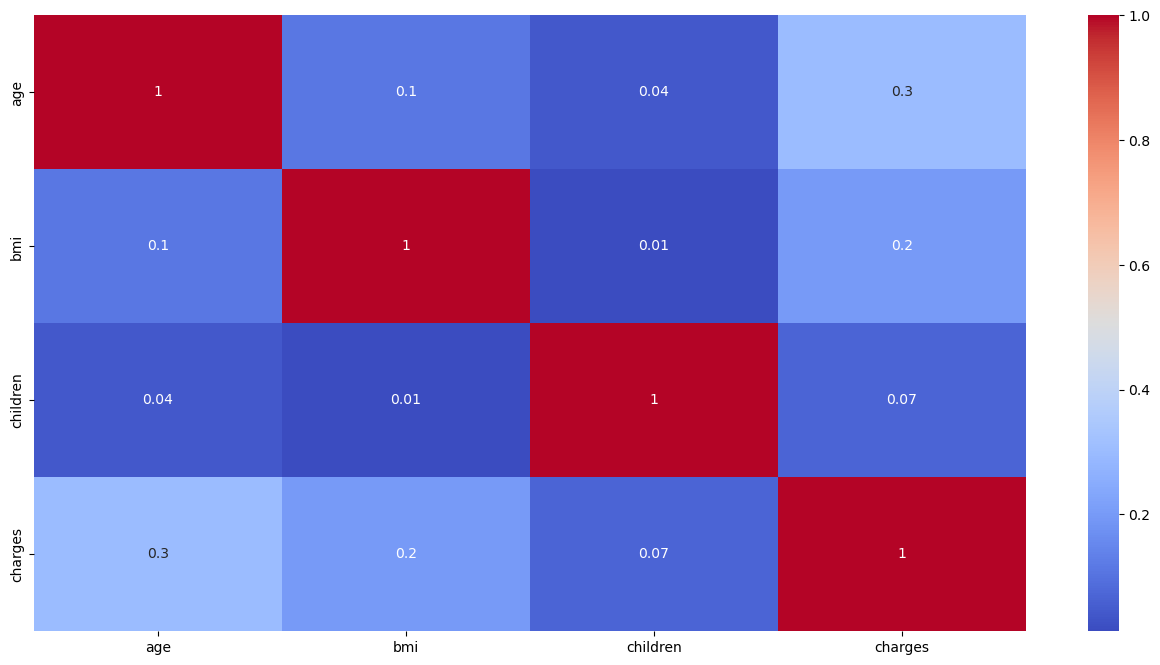

In [12]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,fmt='.1g', cmap='coolwarm')

In [13]:
#usinf labe encoder for the indipendent vriables as they have int value

In [14]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()

In [15]:
df['sex'] = LE.fit_transform(df['sex'])
df['region'] = LE.fit_transform(df['region'])
df['smoker'] = LE.fit_transform(df['smoker'])

In [16]:
df.columns,df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


(Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object'),
 None)

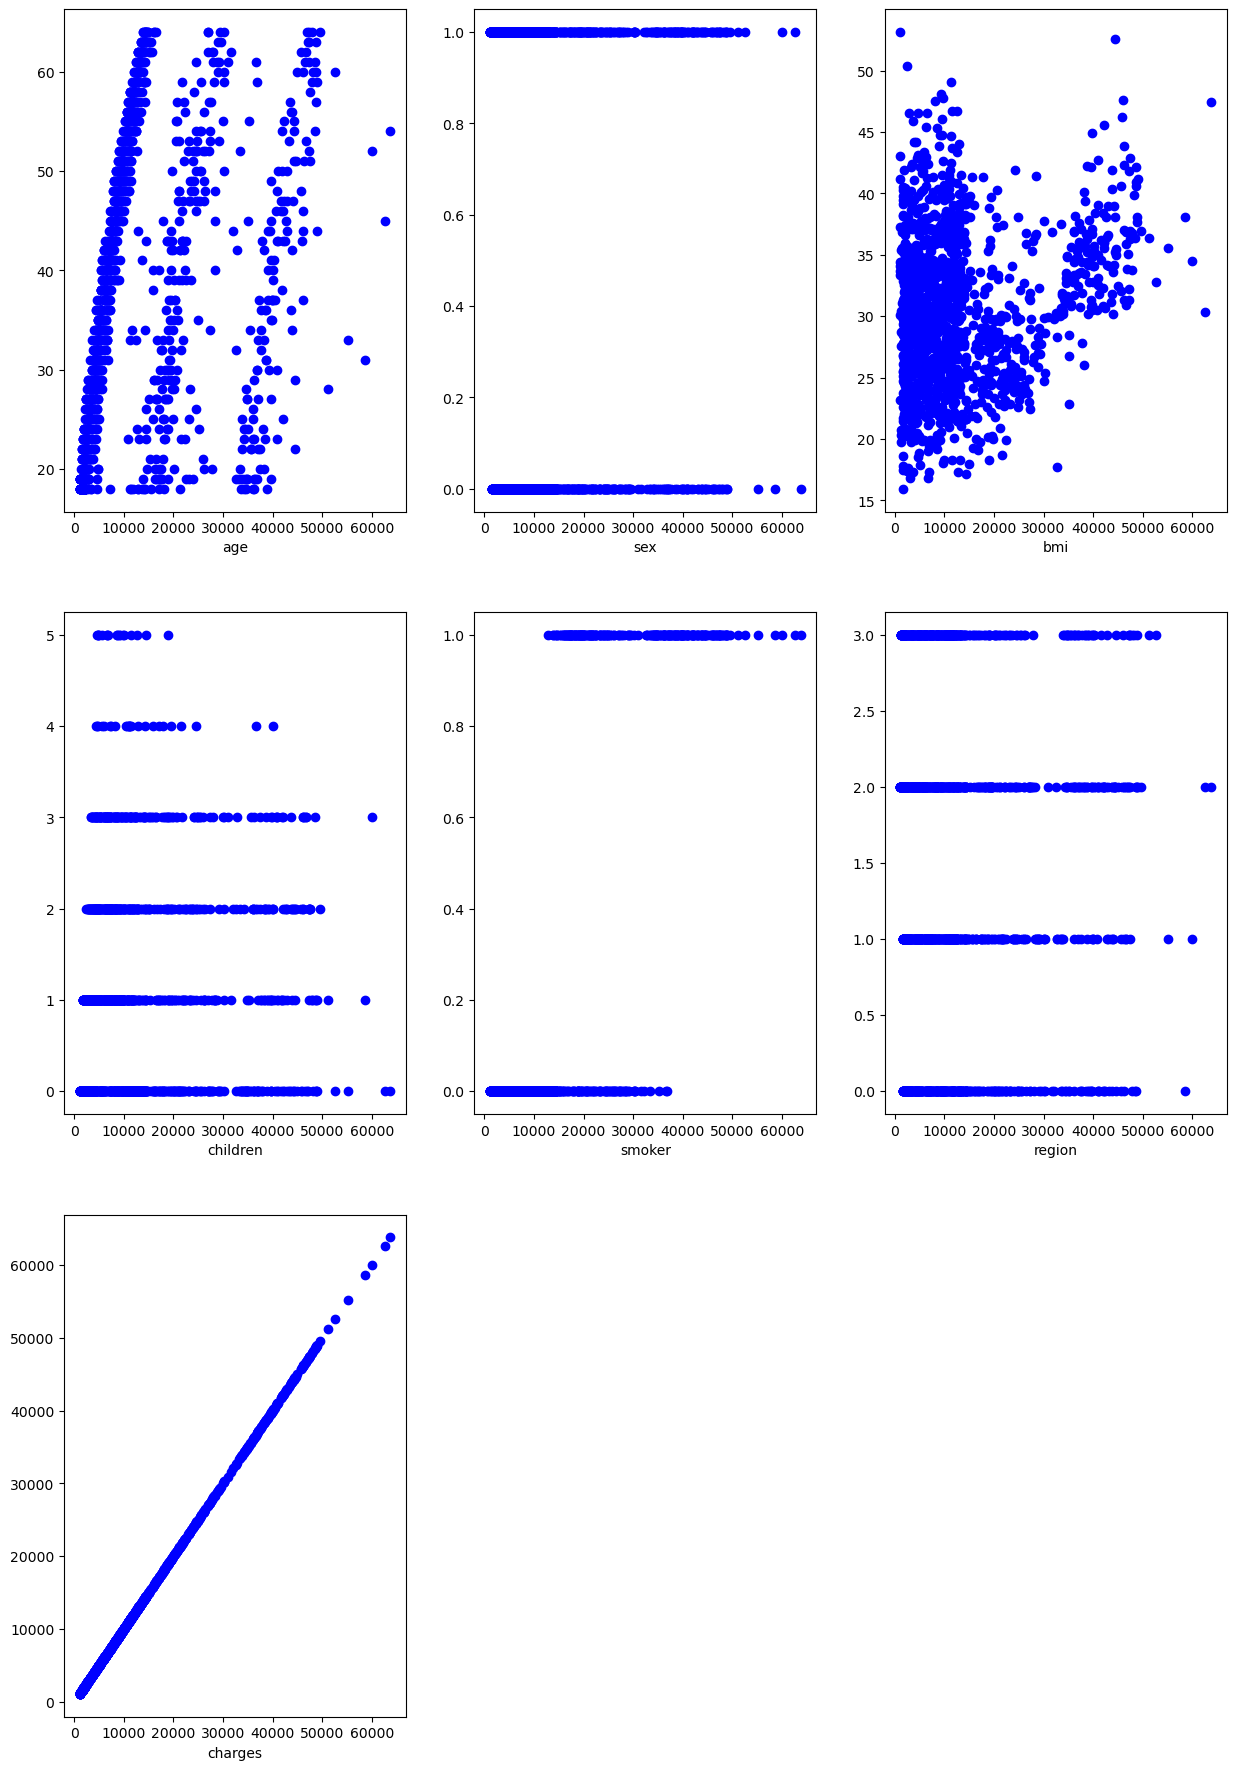

In [17]:
plt.figure(figsize=(15,30))
p = 1
for i in df:
    
    if p<=13:
        plt.subplot(4,3,p)
        plt.scatter(df['charges'],df[i], color='blue')
        plt.xlabel(i)
        
    p+=1
plt.show()

<AxesSubplot:>

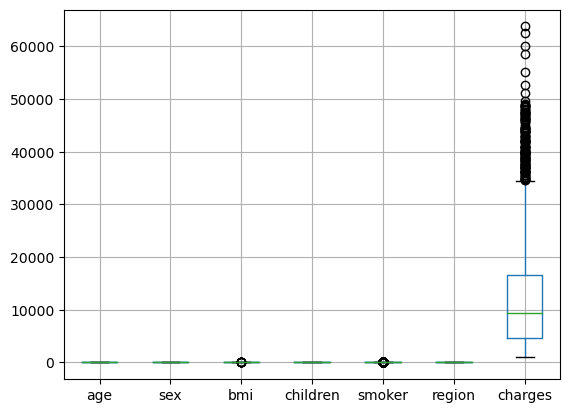

In [18]:
df.boxplot()

In [19]:
#lable has outliers can not remove

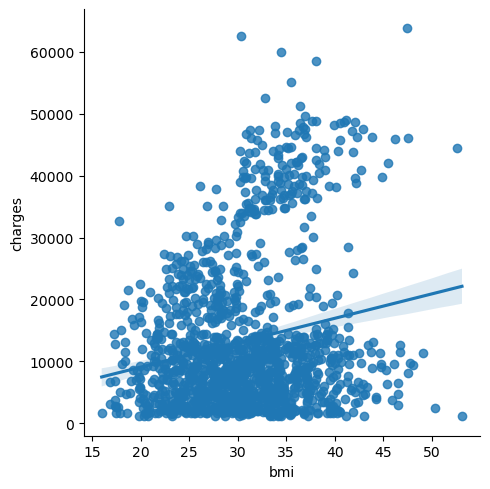

In [20]:
sns.lmplot(y= 'charges', x='bmi',data = df)

In [21]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

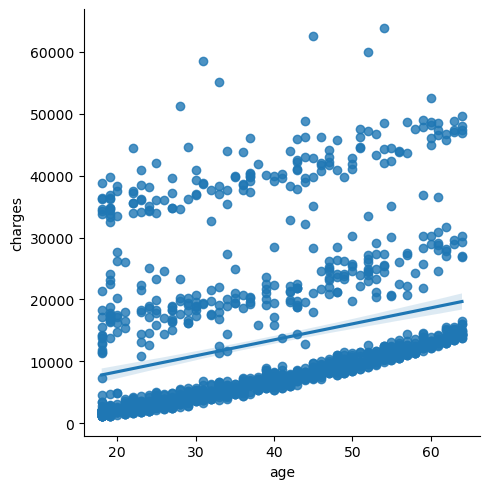

In [22]:
sns.lmplot(y= 'charges', x='age',data = df)

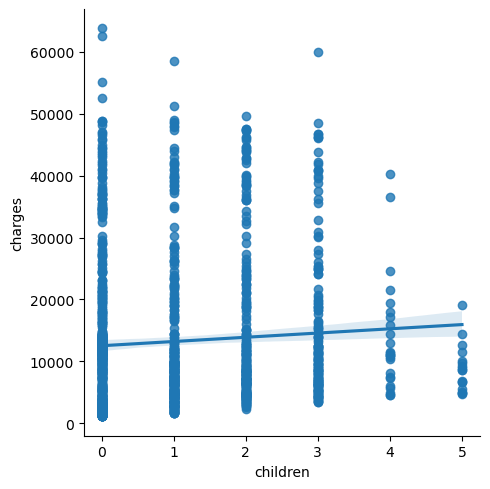

In [23]:
sns.lmplot(y= 'charges', x='children',data = df)

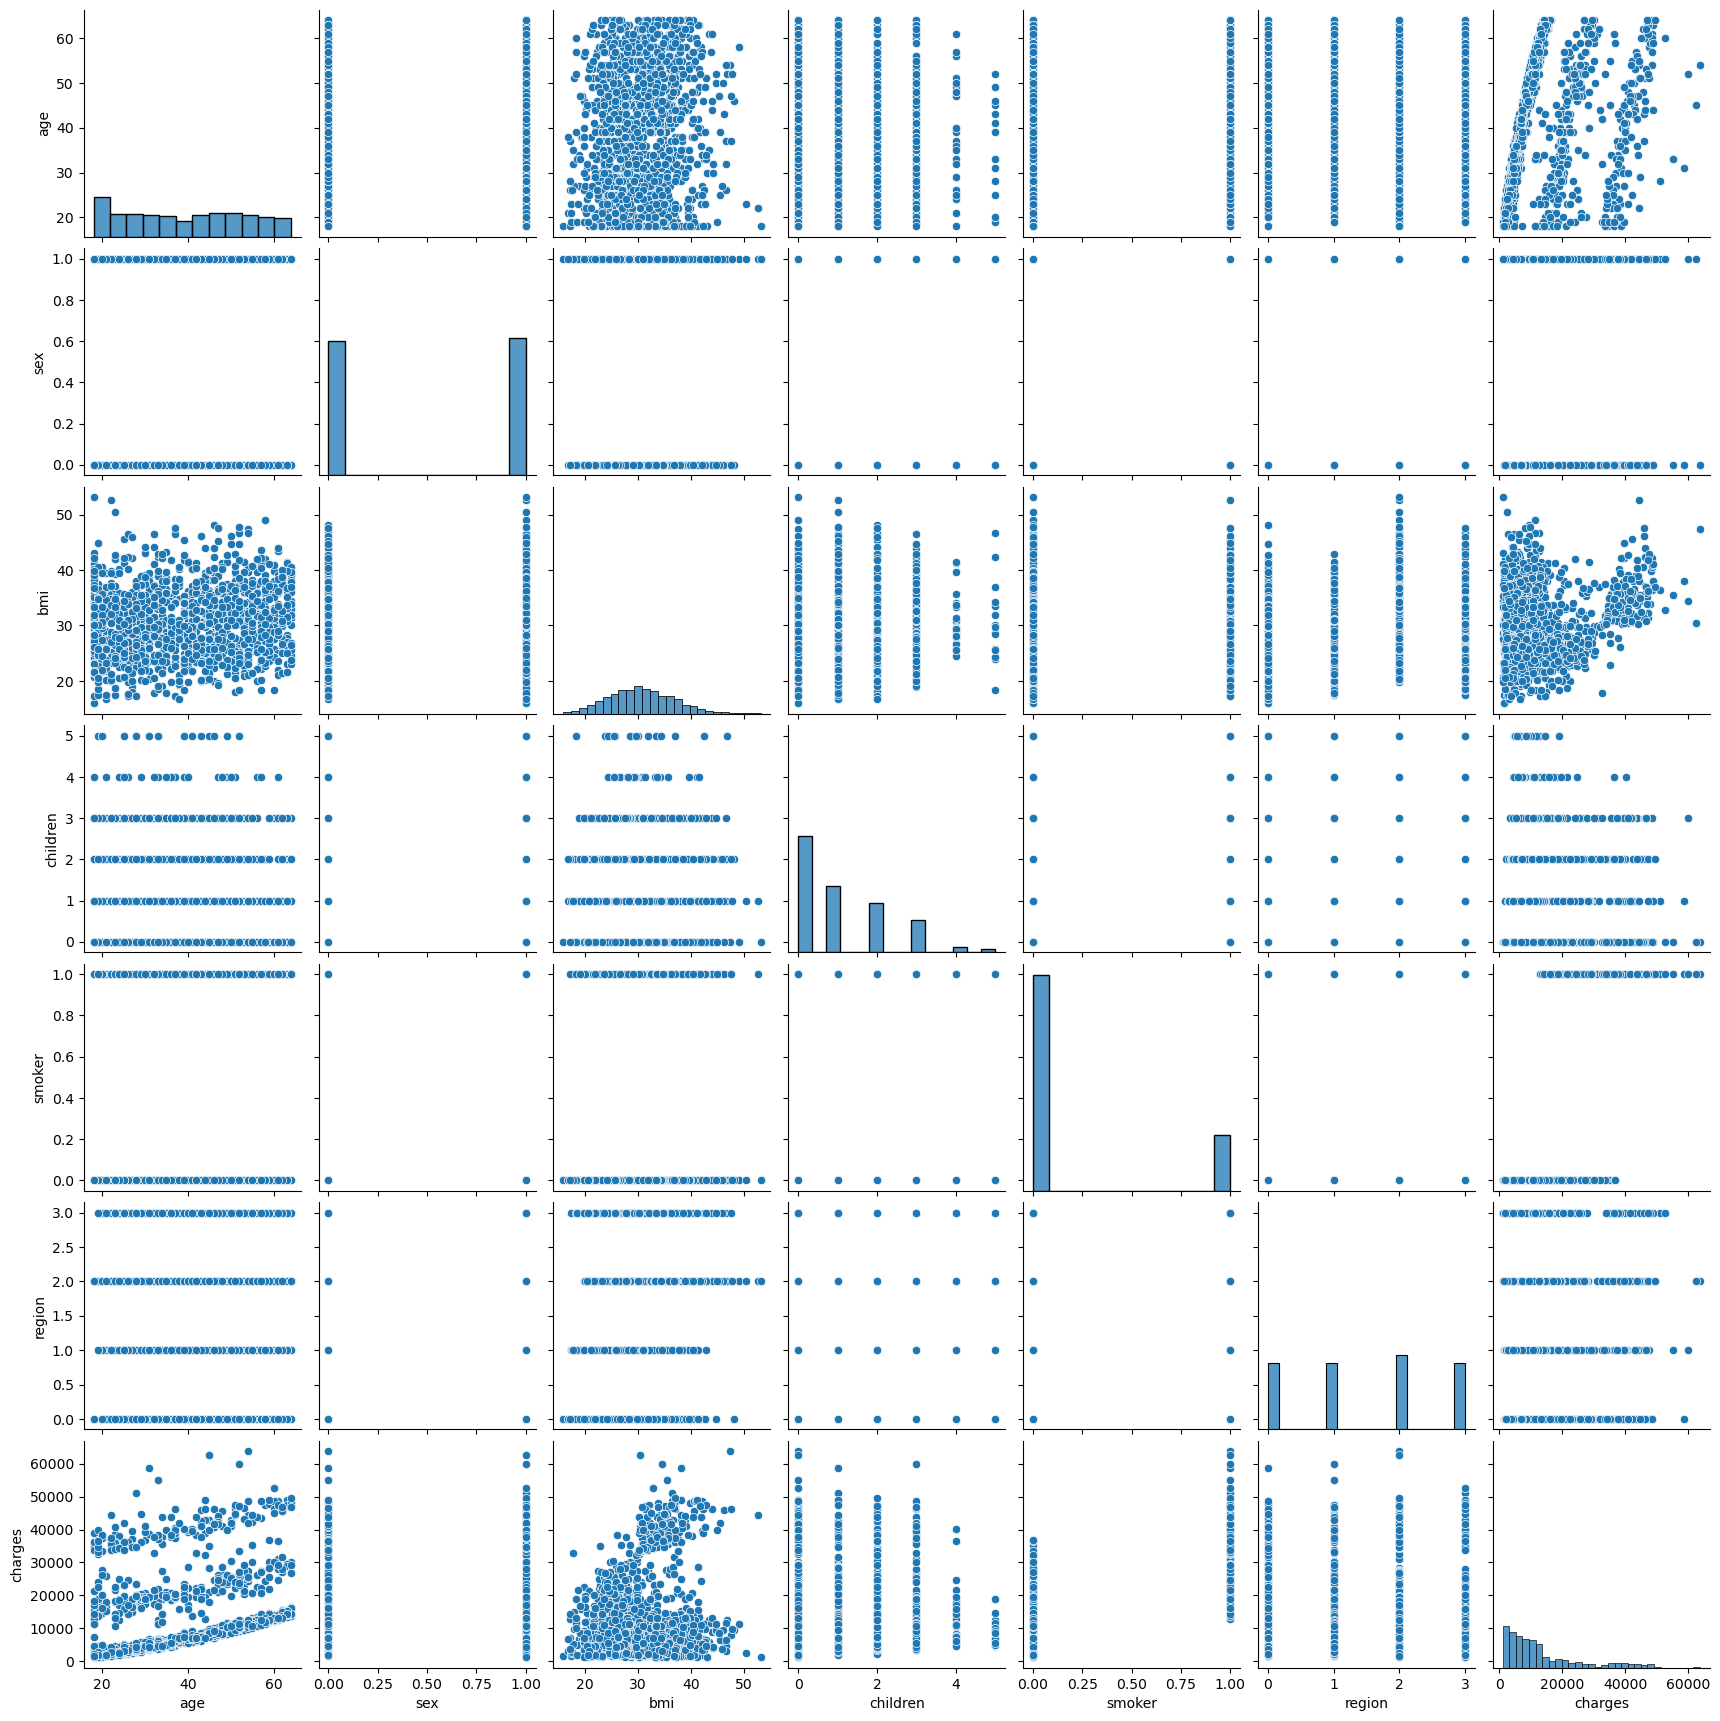

In [24]:
sns.pairplot(df)

In [25]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [26]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


<AxesSubplot:xlabel='charges', ylabel='smoker'>

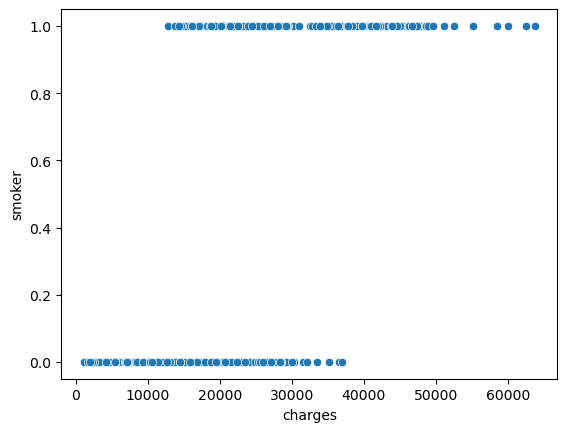

In [27]:
sns.scatterplot(x= 'charges', y='smoker',data = df)

In [28]:
#have corr with smoker

In [29]:
#all data is mp so not removing any column ans no null value

In [30]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

In [31]:
#children have skewness

In [32]:
df['children'] = np.cbrt(df['children'])

In [33]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children   -0.097116
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

In [34]:
#skewness remoed

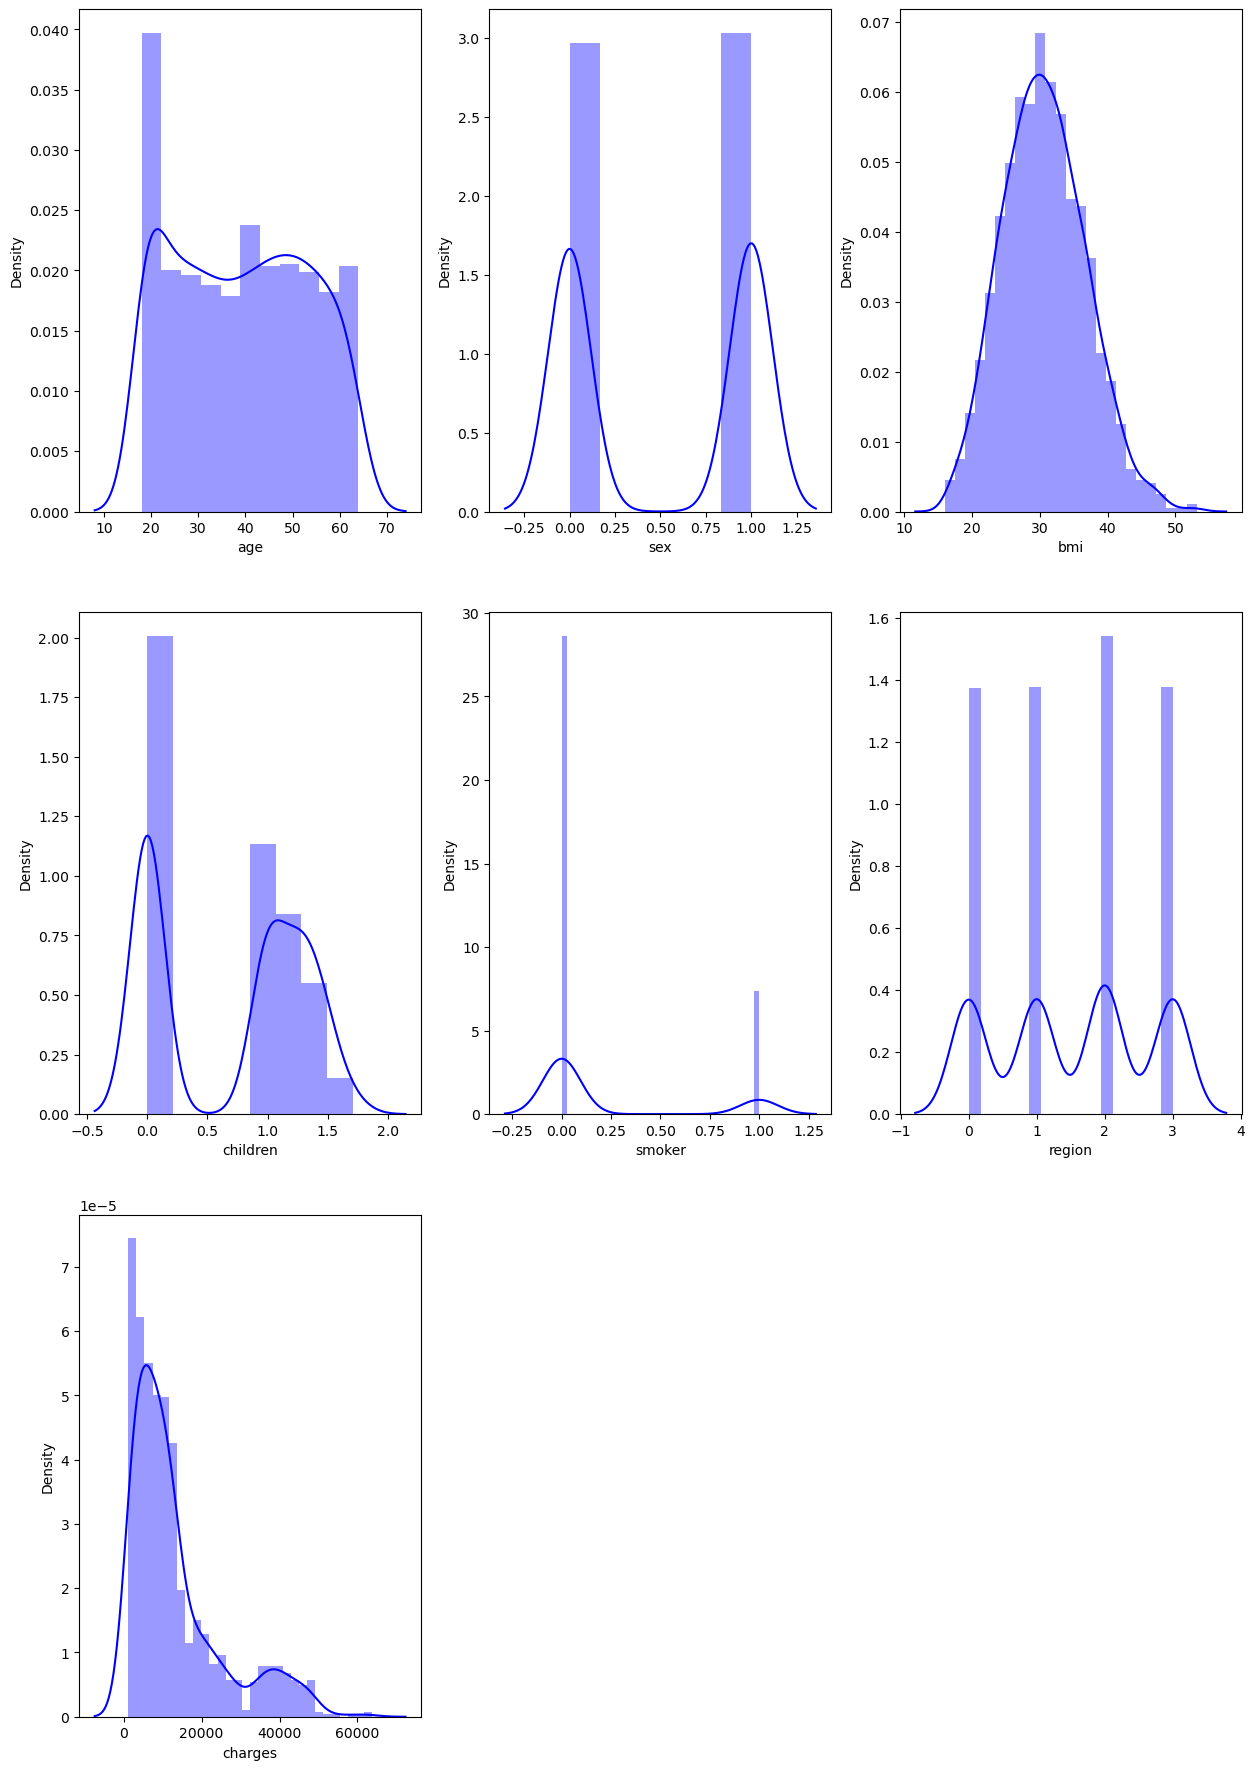

In [35]:
plt.figure(figsize=(15,30))
p = 1
for i in df:
    
    if p<=13:
        plt.subplot(4,3,p)
        sns.distplot(df[i], color='blue')
        plt.xlabel(i)
        
    p+=1
plt.show()

<AxesSubplot:>

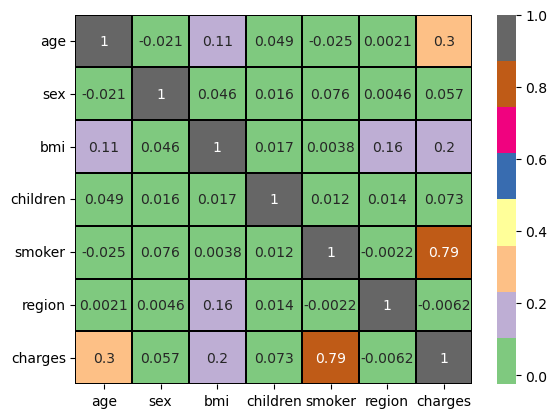

In [36]:
sns.heatmap(df.corr(),annot=True,linecolor='black', cmap='Accent',fmt='.2g',linewidths=0.1)

In [37]:
#have corr with smoker

In [38]:
df.corr().charges.sort_values()

region     -0.006208
sex         0.057292
children    0.072756
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

In [39]:
### region     has negtiv corr

In [40]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


In [41]:
LR = LinearRegression()

In [42]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [44]:
#scaling the ddata

In [45]:
from sklearn.preprocessing import StandardScaler
SL = StandardScaler()

In [46]:
X_train = SL.fit_transform(X_train)
X_test = SL.fit_transform(X_test)

In [47]:
LR.fit(X_train,y_train)

LinearRegression()

In [48]:
from sklearn.metrics import r2_score

# finding best rendom state as tought by our mentor

In [49]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    LR = LinearRegression()
    LR.fit(X_train,y_train)
    predictions = LR.predict(X_test)
    acc=r2_score(y_test,predictions)
    if acc>maxaccu:
        maxaccu=acc
        maxrs =i
print('max acc is',maxaccu,'on r state',maxrs)

max acc is 0.8036926297331406 on r state 112


In [50]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=maxrs)

In [51]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
pred_train =  regressor.predict(X_train)
print('r2_score',r2_score(y_test,y_pred))
print('r2_score on trining data',r2_score(y_train,pred_train)*100)
print('mean_absolute_error',mean_absolute_error(y_test,y_pred))
print('mean_squared_error',mean_squared_error(y_test,y_pred))
print('root mean_squared_error',np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score 0.8036926297331406
r2_score on trining data 72.08640225895205
mean_absolute_error 3954.4787854969477
mean_squared_error 30287263.867564574
root mean_squared_error 5503.386581693546


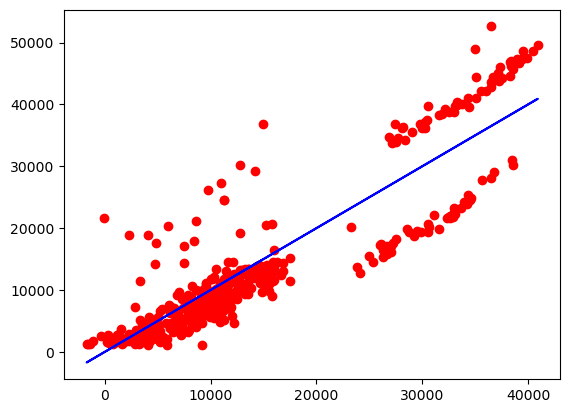

In [52]:
plt.scatter(x=y_pred,y=y_test,color='r')
plt.plot(y_pred,y_pred,color='b')

In [54]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
y_pred1 = svr.predict(X_test)
pred_train1 =  svr.predict(X_train)


In [55]:
print('r2_score',r2_score(y_test,y_pred1))
print('r2_score on trining data',r2_score(y_train,pred_train1)*100)
print('mean_absolute_error',mean_absolute_error(y_test,y_pred1))
print('mean_squared_error',mean_squared_error(y_test,y_pred1))
print('root mean_squared_error',np.sqrt(mean_squared_error(y_test,y_pred1)))

r2_score -0.07831919525241893
r2_score on trining data -9.702506292980306
mean_absolute_error 8506.02887095576
mean_squared_error 166368374.02321127
root mean_squared_error 12898.3864891393


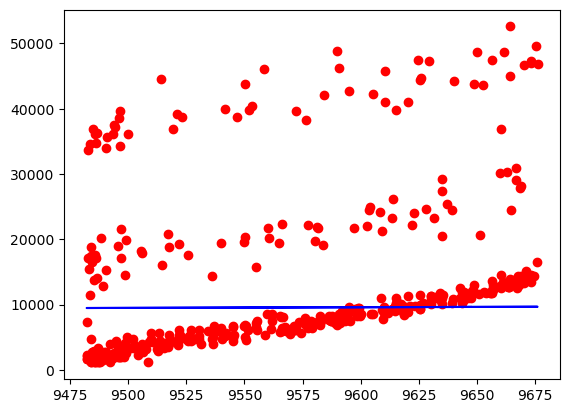

In [56]:
plt.scatter(x=y_pred1,y=y_test,color='r')
plt.plot(y_pred1,y_pred1,color='b')

In [57]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)
pred_train2 =  rf.predict(X_train)
print('r2_score',r2_score(y_test,y_pred2))
print('r2_score on trining data',r2_score(y_train,pred_train2)*100)
print('mean_absolute_error',mean_absolute_error(y_test,y_pred2))
print('mean_squared_error',mean_squared_error(y_test,y_pred2))
print('root mean_squared_error',np.sqrt(mean_squared_error(y_test,y_pred2)))

r2_score 0.8992687736652161
r2_score on trining data 97.01769459914804
mean_absolute_error 2258.2169244361803
mean_squared_error 15541307.631790007
root mean_squared_error 3942.2465209306743


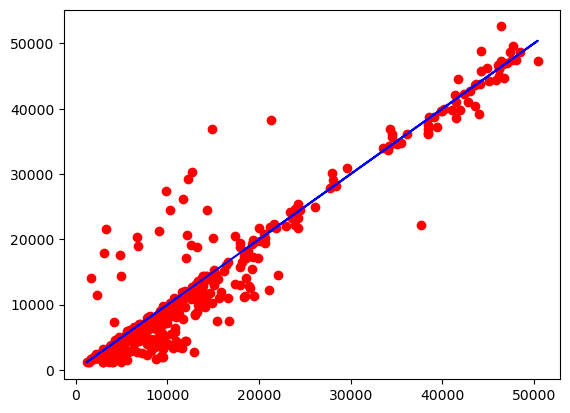

In [58]:
plt.scatter(x=y_pred2,y=y_test,color='r')
plt.plot(y_pred2,y_pred2,color='b')

In [59]:
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)
pred_train3 =  knn.predict(X_train)
print('r2_score',r2_score(y_test,y_pred3))
print('r2_score on trining data',r2_score(y_train,pred_train3)*100)
print('mean_absolute_error',mean_absolute_error(y_test,y_pred3))
print('mean_squared_error',mean_squared_error(y_test,y_pred3))
print('root mean_squared_error',np.sqrt(mean_squared_error(y_test,y_pred3)))

r2_score 0.1835065452668836
r2_score on trining data 38.746305174478316
mean_absolute_error 7848.502710617647
mean_squared_error 125972614.66049035
root mean_squared_error 11223.752254058816


In [60]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred4 = gb.predict(X_test)
pred_train4 =  gb.predict(X_train)
print('r2_score',r2_score(y_test,y_pred4))
print('r2_score on trining data',r2_score(y_train,pred_train4)*100)
print('mean_absolute_error',mean_absolute_error(y_test,y_pred4))
print('mean_squared_error',mean_squared_error(y_test,y_pred4))
print('root mean_squared_error',np.sqrt(mean_squared_error(y_test,y_pred4)))

r2_score 0.9110542664429395
r2_score on trining data 88.92370791918212
mean_absolute_error 2231.4528012551145
mean_squared_error 13722984.004495993
root mean_squared_error 3704.4546163363902


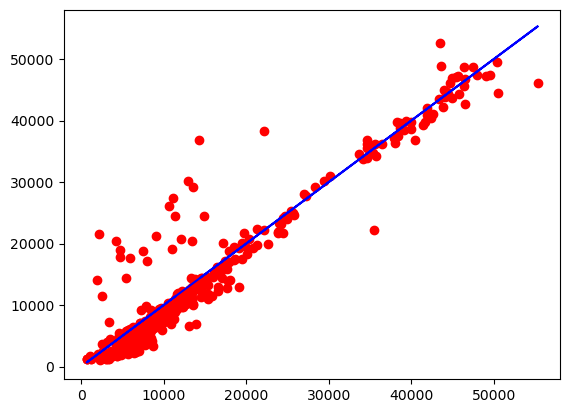

In [61]:
plt.scatter(x=y_pred4,y=y_test,color='r')
plt.plot(y_pred4,y_pred4,color='b')

In [62]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

ls = Lasso()
ls.fit(X_train, y_train)
y_pred5 = ls.predict(X_test)
pred_train5 =  ls.predict(X_train)
print('r2_score',r2_score(y_test,y_pred5))
print('r2_score on trining data',r2_score(y_train,pred_train5)*100)
print('mean_absolute_error',mean_absolute_error(y_test,y_pred5))
print('mean_squared_error',mean_squared_error(y_test,y_pred5))
print('root mean_squared_error',np.sqrt(mean_squared_error(y_test,y_pred5)))

r2_score 0.8037181239999585
r2_score on trining data 72.08639177057853
mean_absolute_error 3954.5274408111536
mean_squared_error 30283330.48704415
root mean_squared_error 5503.029210084583


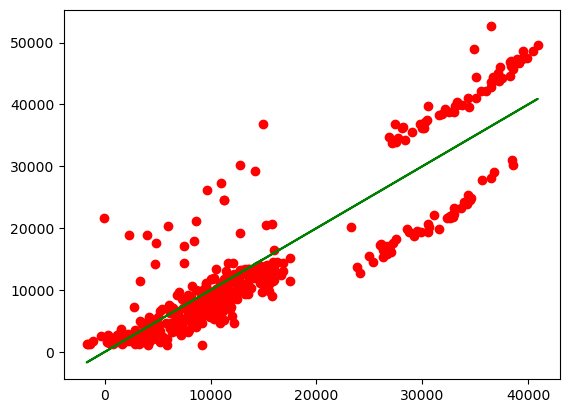

In [63]:
plt.scatter(x=y_pred5,y=y_test,color='r')
plt.plot(y_pred5,y_pred5,color='g')

In [64]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

rd = Ridge()
rd.fit(X_train, y_train)
y_pred6 = rd.predict(X_test)
pred_train6 =  rd.predict(X_train)
print('r2_score',r2_score(y_test,y_pred6))
print('r2_score on trining data',r2_score(y_train,pred_train6)*100)
print('mean_absolute_error',mean_absolute_error(y_test,y_pred6))
print('mean_squared_error',mean_squared_error(y_test,y_pred6))
print('root mean_squared_error',np.sqrt(mean_squared_error(y_test,y_pred6)))

r2_score 0.803668277514326
r2_score on trining data 72.08328798087827
mean_absolute_error 3966.795947308479
mean_squared_error 30291021.047317915
root mean_squared_error 5503.727922719101


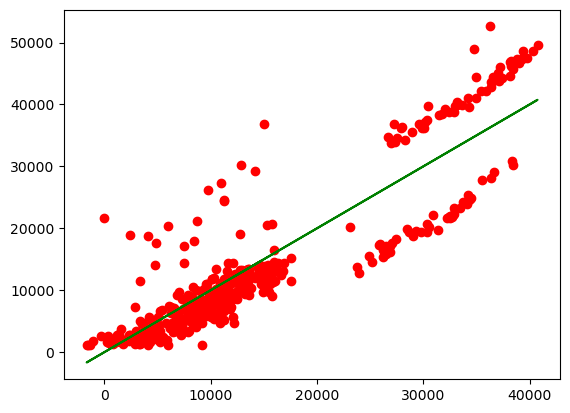

In [65]:
plt.scatter(x=y_pred6,y=y_test,color='r')
plt.plot(y_pred6,y_pred6,color='g')

In [66]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred7 = dt.predict(X_test)
pred_train7 =  dt.predict(X_train)
print('r2_score',r2_score(y_test,y_pred7))
print('r2_score on trining data',r2_score(y_train,pred_train7)*100)
print('mean_absolute_error',mean_absolute_error(y_test,y_pred7))
print('mean_squared_error',mean_squared_error(y_test,y_pred7))
print('root mean_squared_error',np.sqrt(mean_squared_error(y_test,y_pred7)))

r2_score 0.8258050093477235
r2_score on trining data 99.85672773708049
mean_absolute_error 2261.170435495475
mean_squared_error 26875657.49121605
root mean_squared_error 5184.173752027998


In [67]:
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor

ER = ExtraTreesRegressor()
ER.fit(X_train, y_train)
y_pred8 = ER.predict(X_test)
pred_train8 =  ER.predict(X_train)
print('r2_score',r2_score(y_test,y_pred8 ))
print('r2_score on trining data',r2_score(y_train,pred_train8)*100)
print('mean_absolute_error',mean_absolute_error(y_test,y_pred8))
print('mean_squared_error',mean_squared_error(y_test,y_pred8))
print('root mean_squared_error',np.sqrt(mean_squared_error(y_test,y_pred8)))

r2_score 0.878327161560782
r2_score on trining data 99.85672773708049
mean_absolute_error 2401.0097311975114
mean_squared_error 18772282.25468349
root mean_squared_error 4332.699188113974


In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
score = cross_val_score(regressor,x,y)
print(score)
print(score.mean())
print('difrence-',(r2_score(y_test,y_pred)-score.mean())*100)

[0.76100043 0.7073409  0.77828138 0.73451944 0.75348367]
0.7469251650437994
difrence- 5.676746468934124


In [70]:
score = cross_val_score(svr,x,y)
print(score)
print(score.mean())
print('difrence-',(r2_score(y_test,y_pred1)-score.mean())*100)

[-0.11535203 -0.11039096 -0.07993889 -0.10418025 -0.10828726]
-0.10362987959695244
difrence- 2.5310684344533514


In [71]:
score = cross_val_score(rf,x,y)
print(score)
print(score.mean())
print('difrence-',(r2_score(y_test,y_pred2)-score.mean())*100)

[0.85479975 0.77514845 0.87089021 0.83136787 0.85241638]
0.83692453393625
difrence- 6.234423972896607


In [72]:
score = cross_val_score(knn ,x,y)
print(score)
print(score.mean())
print('difrence-',(r2_score(y_test,y_pred3)-score.mean())*100)

[0.19308695 0.10859643 0.04065226 0.18860017 0.18071946]
0.14233105563646964
difrence- 4.117548963041395


In [73]:
score = cross_val_score(gb ,x,y)
print(score)
print(score.mean())
print('difrence-',(r2_score(y_test,y_pred4)-score.mean())*100)

[0.8752004  0.79167733 0.89421047 0.84897437 0.85969798]
0.8539521080327057
difrence- 5.7102158410233805


In [74]:
score = cross_val_score(ls ,x,y)
print(score)
print(score.mean())
print('difrence-',(r2_score(y_test,y_pred5)-score.mean())*100)

[0.76102676 0.70737997 0.77825243 0.73452286 0.75348502]
0.7469334085870423
difrence- 5.678471541291619


In [75]:
score = cross_val_score(rd ,x,y)
print(score)
print(score.mean())
print('difrence-',(r2_score(y_test,y_pred6)-score.mean())*100)

[0.76117049 0.70769347 0.77762902 0.73488356 0.75321901]
0.7469191109847004
difrence- 5.674916652962558


In [76]:
score = cross_val_score(dt ,x,y)
print(score)
print(score.mean())
print('difrence-',(r2_score(y_test,y_pred7)-score.mean())*100)

[0.7793523  0.67451838 0.75302533 0.73000717 0.67292003]
0.7219646422667878
difrence- 10.38403670809357


In [77]:
score = cross_val_score(ER ,x,y)
print(score)
print(score.mean())
print('difrence-',(r2_score(y_test,y_pred8)-score.mean())*100)

[0.83725922 0.74759154 0.84943281 0.80958164 0.84486462]
0.8177459672670018
difrence- 6.058119429378028


In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV


In [83]:
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}



In [85]:
gb.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [84]:
grid_search = GridSearchCV(estimator = gb, param_grid = param_grid, cv = 3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]})

In [80]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [86]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [87]:
best_params

{'max_depth': 110,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [88]:
best_model

GradientBoostingRegressor(max_depth=110, max_features=2, min_samples_leaf=5,
                          min_samples_split=10)

In [89]:
best_model.fit(X_train, y_train)
y_pred9 = best_model.predict(X_test)
print('r2_score',r2_score(y_test,y_pred9))
print('mean_absolute_error',mean_absolute_error(y_test,y_pred9))
print('mean_squared_error',mean_squared_error(y_test,y_pred9))
print('root mean_squared_error',np.sqrt(mean_squared_error(y_test,y_pred9)))

r2_score 0.8781497681560965
mean_absolute_error 2759.546769798902
mean_squared_error 18799651.379178274
root mean_squared_error 4335.85647585091


In [ ]:
## observation

""""no null values found
used lable encoder for fetures
according to creted modle -- gb[GradientBoostingRegressor]is the best model 
all data is imp so not removing any column ans no null value

did mot copy any code but did take help of many websites like sklearn, chatgpt, youtube, google and many more done by my self only""""""
